In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_cleaned.csv')
print(df.shape)

(1460, 69)


In [3]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Sa

In [4]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
df.dtypes

MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64


In [5]:
numerical_ft = df.dtypes[df.dtypes != 'object'].index
numerical_ft

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

[Text(0.5, 0, 'Price'), Text(0, 0.5, 'Frequency')]

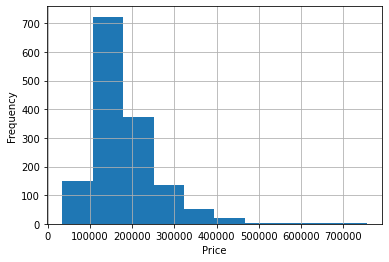

In [6]:
ax = df.SalePrice.hist()
ax.set(xlabel="Price", ylabel="Frequency")

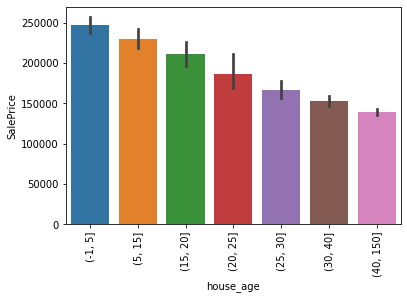

In [7]:
# The house's age must be related to SalePrice.
df['house_age'] = df['YrSold'] - df['YearBuilt']
bins = [-1, 5, 15, 20, 25, 30, 40, 150]
df['house_age'] = pd.cut(df['house_age'], bins)
chart = sns.barplot(x = df['house_age'], y = df['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [8]:
# converting type of house_age from interval to numerical
for i in range(len(df['house_age'])):
    df.loc[i,'house_age_num'] = (df['house_age'][i].left + df['house_age'][i].right) / 2

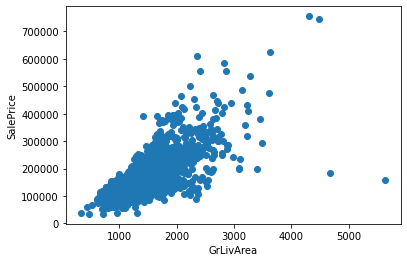

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [10]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_age,house_age_num
523,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,2260,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,13.0,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750,"(-1, 5]",2.0
1298,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,5644,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,12.0,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000,"(-1, 5]",2.0


In [11]:
#df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)], inplace = True, axis = 1)

In [12]:
# Add new features.
numerical_ft = df.dtypes[df.dtypes != 'object'].index
numerical_ft

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'house_age', 'house_age_num'],
      dtype='object')

In [13]:
categorical_ft = df.dtypes[df.dtypes == 'object'].index
categorical_ft

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

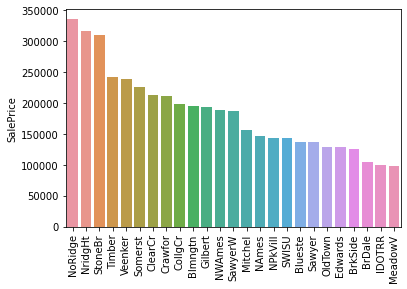

In [14]:
# Calculate each region that associates with SalePrice.
avg_price = {}
for i in df.Neighborhood.values:
    avg = df[df['Neighborhood'] == i].SalePrice.sum()/df[df['Neighborhood'] == i].count()
    avg_price[i] = avg.SalePrice

avgdf = pd.DataFrame.from_dict(avg_price, orient = 'index', columns = ['SalePrice'])
avgdf.sort_values(by = ['SalePrice'], ascending = False, inplace = True)

chart = sns.barplot(x = avgdf.index, y = avgdf.SalePrice)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

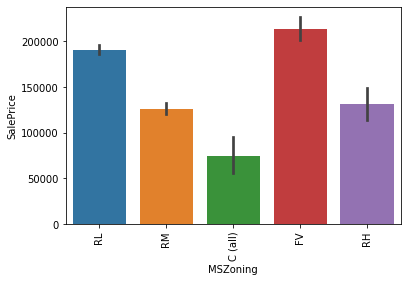

In [15]:
chart = sns.barplot(x = df['MSZoning'], y = df['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [16]:
# Feature Engineering
df_train = pd.read_csv('train_cleaned.csv')
df_test = pd.read_csv('test_cleaned.csv')
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

Y_train = df_train['SalePrice']
all_data = pd.concat((df_train, df_test),ignore_index = True).reset_index(drop = True)
all_data.drop('SalePrice', inplace = True, axis = 1)
print(all_data.shape)

(2919, 68)


<AxesSubplot:>

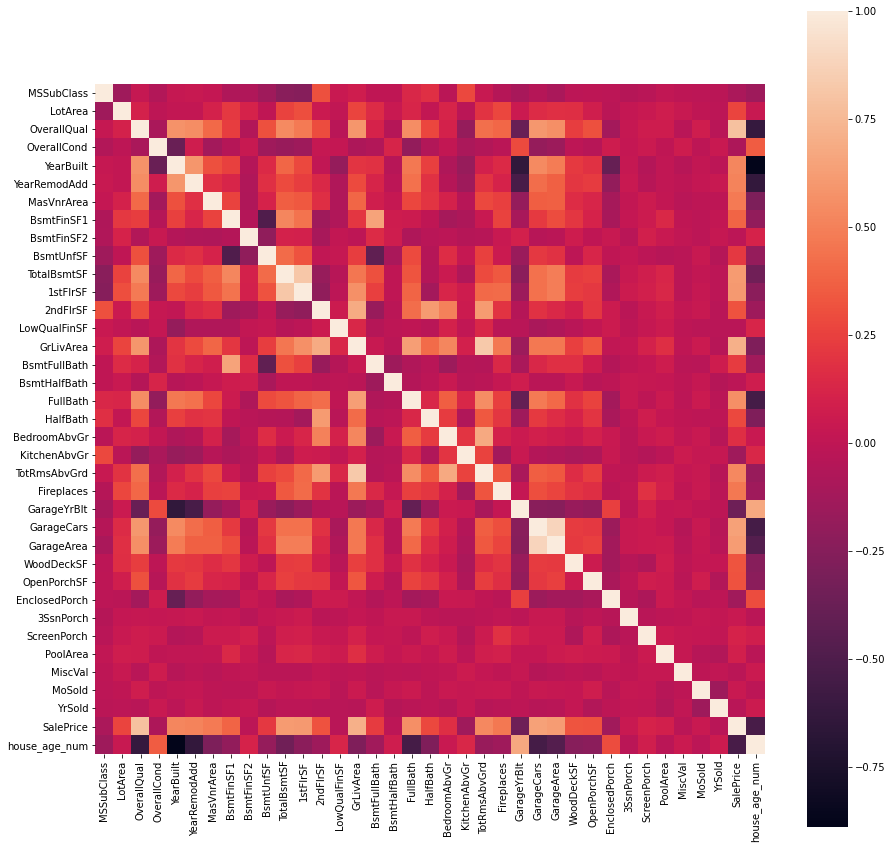

In [17]:
# Feature selection for numerical features through heatmap
corr = df[numerical_ft].corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, square = True)

<AxesSubplot:>

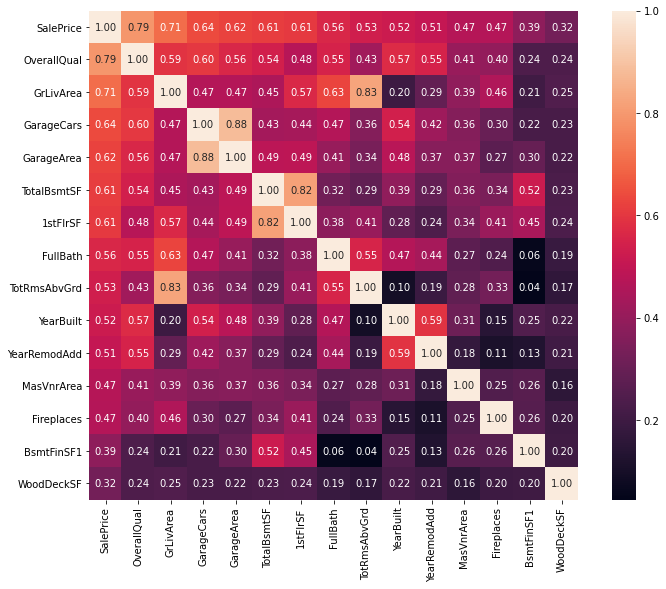

In [18]:
# Find top 15 correlation that related to SalePrice
r=15
col_t = corr.nlargest(r, 'SalePrice')['SalePrice'].index
top15corr = df[col_t].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(top15corr, annot = True , square = True, fmt = '.2f')

In [19]:
col_t

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF'],
      dtype='object')

<AxesSubplot:>

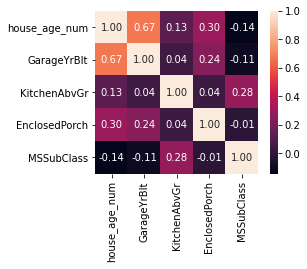

In [20]:
# Find bottom 5 correlation that related to SalePrice
r=5
col_b = corr.nsmallest(r, 'SalePrice')['SalePrice'].index
bottom15corr = df[col_b].corr()
plt.subplots(figsize=(4,3))
sns.heatmap(bottom15corr, annot = True , square = True, fmt = '.2f')

In [21]:
col_b

Index(['house_age_num', 'GarageYrBlt', 'KitchenAbvGr', 'EnclosedPorch',
       'MSSubClass'],
      dtype='object')

In [22]:
# Created the new numerical feature -- House's ages
all_data['House_age'] = np.abs(all_data['YrSold'] - all_data['YearBuilt'])
bins = [-1, 5, 15, 20, 25, 30, 40, 200]
all_data['House_age'] = pd.cut(all_data['House_age'], bins)

for i in range(2919):
    all_data.loc[i,'House_age_num'] = (all_data.loc[i,'House_age'].left + all_data.loc[i,'House_age'].right) / 2

In [23]:
# According to the heatmap that correlates with SalePrice feature, select high correlated feature, and drops some features that similar to each other.
all_data_num = all_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'House_age_num']]

In [24]:
# Label Encoder with several categorical feature.
categorical_ft_lb = pd.DataFrame()
categorical_ft_lb = all_data[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']]

In [25]:
# Converting categorical features to numerical features, following the goodness and badness from 5 to 0.
categorical_num_ft = pd.DataFrame()
le = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
for i in categorical_ft_lb.columns:
    categorical_num_ft.loc[:,i] = categorical_ft_lb.loc[:,i].map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [26]:
print (all_data.shape)
print(all_data_num.shape)
print(categorical_num_ft.shape)

(2919, 70)
(2919, 10)
(2919, 8)


In [27]:
# One hot encoding.
categorical_ft_OHE = pd.DataFrame()
categorical_ft_OHE = all_data[['Neighborhood', 'MSZoning', 'CentralAir']]
categorical_ft_OHE = pd.get_dummies(categorical_ft_OHE)

In [28]:
#Concatenate all features 
df_whole = pd.concat((all_data_num, categorical_num_ft, categorical_ft_OHE), axis = 1)
print (df_whole.shape)
X_train = df_whole.iloc[:ntrain, :]
X_test = df_whole.iloc[ntrain:, :]
print (X_train.shape)
print (X_test.shape)

X_train.to_csv('X_train.csv', index = False)
Y_train.to_csv('Y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
#df_out.to_csv('dataset.csv')

(2919, 50)
(1460, 50)
(1459, 50)
